
## WeatherPy

In this example, you'll be creating a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. To accomplish this, you'll be utilizing a [simple Python library](https://pypi.python.org/pypi/citipy), the [OpenWeatherMap API](https://openweathermap.org/api), and a little common sense to create a representative model of weather across world cities.

Your objective is to build a series of scatter plots to showcase the following relationships:

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

Your final notebook must:

* Randomly select **at least** 500 unique (non-repeat) cities based on latitude and longitude.
* Perform a weather check on each of the cities using a series of successive API calls.
* Include a print log of each city as it's being processed with the city number and city name.
* Save both a CSV of all data retrieved and png images for each scatter plot.

As final considerations:

* You must complete your analysis using a Jupyter notebook.
* You must use the Matplotlib or Pandas plotting libraries.
* You must include a written description of three observable trends based on the data.
* You must use proper labeling of your plots, including aspects like: Plot Titles (with date of analysis) and Axes Labels.
* See [Example Solution](WeatherPy_Example.pdf) for a reference on expected format.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from urllib.error import HTTPError
import openweathermapy as ow
from pprint import pprint
import pandas as pd
import numpy as np
import requests
import time
import os

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
os.makedirs(os.path.join('output_data'),exist_ok=True)
output_data_file = os.path.join("output_data","cities.csv")

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
cities_count = len(cities)
print(cities_count)
# print(cities)


596


## Perform API Calls

In [3]:

# Starting URL for Weather Map API Call
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 
# create setting and desired_keys
setting = {'units':'Imperial','appid':api_key}
desired_keys = ['clouds.all','sys.country','dt','main.humidity','main.temp_max','wind.speed','coord.lat','coord.lon']


In [4]:
cloudiness = []
country = []
date = []
humidity = []
max_temp = []
wind_speed = []
lat =[]
lng =[]
cities_list = []

In [15]:
print('Beginning Data Retrieval')
print('---------------------')
counter = 1
for city in cities:
    city_url = base_url + '&q=' + city.replace(' ','+')
    print(f'Processing City # {counter} | {city}')
    print(city_url)
    try:
        city_data = ow.get_current(city,**setting)
        cl,ct,dt,hm,mt,ws,lt,ln = city_data(*desired_keys)
        cloudiness.append(cl)
        country.append(ct)
        date.append(dt)
        humidity.append(hm)
        max_temp.append(mt)
        wind_speed.append(ws)
        lat.append(lt)
        lng.append(ln)
        cities_list.append(city)
    except HTTPError:
        print('City not found. skipping...')
    counter += 1
print('---------------------')
print('Data Retrieval Complete')

Beginning Data Retrieval
---------------------
Processing City # 1 | carnarvon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=634970e434778cb04fecf9017863908c&q=carnarvon
Processing City # 2 | vaini
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=634970e434778cb04fecf9017863908c&q=vaini
Processing City # 3 | bluff
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=634970e434778cb04fecf9017863908c&q=bluff
Processing City # 4 | agadez
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=634970e434778cb04fecf9017863908c&q=agadez
Processing City # 5 | meyungs
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=634970e434778cb04fecf9017863908c&q=meyungs
City not found. skipping...
Processing City # 6 | caruray
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=634970e434778cb04fecf9017863908c&q=caruray
Processing City # 7 | butaritari
http://api.openweathermap.org/data/2.5/weather?units

Processing City # 56 | barentsburg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=634970e434778cb04fecf9017863908c&q=barentsburg
City not found. skipping...
Processing City # 57 | esperance
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=634970e434778cb04fecf9017863908c&q=esperance
Processing City # 58 | cape town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=634970e434778cb04fecf9017863908c&q=cape+town
Processing City # 59 | hami
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=634970e434778cb04fecf9017863908c&q=hami
Processing City # 60 | qaanaaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=634970e434778cb04fecf9017863908c&q=qaanaaq
Processing City # 61 | miraflores
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=634970e434778cb04fecf9017863908c&q=miraflores
Processing City # 62 | clarence town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID

Processing City # 113 | hasanabad
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=634970e434778cb04fecf9017863908c&q=hasanabad
Processing City # 114 | okhotsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=634970e434778cb04fecf9017863908c&q=okhotsk
Processing City # 115 | port hardy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=634970e434778cb04fecf9017863908c&q=port+hardy
Processing City # 116 | bur gabo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=634970e434778cb04fecf9017863908c&q=bur+gabo
City not found. skipping...
Processing City # 117 | byron bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=634970e434778cb04fecf9017863908c&q=byron+bay
Processing City # 118 | albany
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=634970e434778cb04fecf9017863908c&q=albany
Processing City # 119 | jamestown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPI

Processing City # 168 | goderich
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=634970e434778cb04fecf9017863908c&q=goderich
Processing City # 169 | marawi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=634970e434778cb04fecf9017863908c&q=marawi
Processing City # 170 | sao joao da barra
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=634970e434778cb04fecf9017863908c&q=sao+joao+da+barra
Processing City # 171 | kavaratti
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=634970e434778cb04fecf9017863908c&q=kavaratti
Processing City # 172 | pangody
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=634970e434778cb04fecf9017863908c&q=pangody
Processing City # 173 | riberalta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=634970e434778cb04fecf9017863908c&q=riberalta
Processing City # 174 | salalah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=634970e434778c

Processing City # 224 | takab
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=634970e434778cb04fecf9017863908c&q=takab
Processing City # 225 | bandarbeyla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=634970e434778cb04fecf9017863908c&q=bandarbeyla
Processing City # 226 | benghazi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=634970e434778cb04fecf9017863908c&q=benghazi
Processing City # 227 | linares
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=634970e434778cb04fecf9017863908c&q=linares
Processing City # 228 | eydhafushi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=634970e434778cb04fecf9017863908c&q=eydhafushi
Processing City # 229 | palabuhanratu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=634970e434778cb04fecf9017863908c&q=palabuhanratu
City not found. skipping...
Processing City # 230 | cumberland
http://api.openweathermap.org/data/2.5/weather?units=Im

Processing City # 280 | constitucion
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=634970e434778cb04fecf9017863908c&q=constitucion
Processing City # 281 | lamar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=634970e434778cb04fecf9017863908c&q=lamar
Processing City # 282 | umm bab
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=634970e434778cb04fecf9017863908c&q=umm+bab
Processing City # 283 | half moon bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=634970e434778cb04fecf9017863908c&q=half+moon+bay
Processing City # 284 | havoysund
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=634970e434778cb04fecf9017863908c&q=havoysund
Processing City # 285 | mrirt
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=634970e434778cb04fecf9017863908c&q=mrirt
City not found. skipping...
Processing City # 286 | shenjiamen
http://api.openweathermap.org/data/2.5/weather?units=Imperial

Processing City # 335 | biryusinsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=634970e434778cb04fecf9017863908c&q=biryusinsk
Processing City # 336 | purpe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=634970e434778cb04fecf9017863908c&q=purpe
Processing City # 337 | racovita
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=634970e434778cb04fecf9017863908c&q=racovita
Processing City # 338 | baruun-urt
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=634970e434778cb04fecf9017863908c&q=baruun-urt
Processing City # 339 | ambodifototra
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=634970e434778cb04fecf9017863908c&q=ambodifototra
City not found. skipping...
Processing City # 340 | touros
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=634970e434778cb04fecf9017863908c&q=touros
Processing City # 341 | umba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APP

Processing City # 391 | tiruchchendur
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=634970e434778cb04fecf9017863908c&q=tiruchchendur
Processing City # 392 | urumqi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=634970e434778cb04fecf9017863908c&q=urumqi
City not found. skipping...
Processing City # 393 | den helder
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=634970e434778cb04fecf9017863908c&q=den+helder
Processing City # 394 | palafrugell
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=634970e434778cb04fecf9017863908c&q=palafrugell
Processing City # 395 | fortuna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=634970e434778cb04fecf9017863908c&q=fortuna
Processing City # 396 | altotting
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=634970e434778cb04fecf9017863908c&q=altotting
Processing City # 397 | ilhabela
http://api.openweathermap.org/data/2.5/weather?units=

Processing City # 447 | utica
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=634970e434778cb04fecf9017863908c&q=utica
Processing City # 448 | berga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=634970e434778cb04fecf9017863908c&q=berga
Processing City # 449 | robe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=634970e434778cb04fecf9017863908c&q=robe
Processing City # 450 | yar-sale
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=634970e434778cb04fecf9017863908c&q=yar-sale
Processing City # 451 | broome
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=634970e434778cb04fecf9017863908c&q=broome
Processing City # 452 | la ligua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=634970e434778cb04fecf9017863908c&q=la+ligua
Processing City # 453 | gobabis
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=634970e434778cb04fecf9017863908c&q=gobabis
Processing 

Processing City # 503 | port augusta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=634970e434778cb04fecf9017863908c&q=port+augusta
Processing City # 504 | sisimiut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=634970e434778cb04fecf9017863908c&q=sisimiut
Processing City # 505 | tiznit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=634970e434778cb04fecf9017863908c&q=tiznit
Processing City # 506 | shitkino
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=634970e434778cb04fecf9017863908c&q=shitkino
Processing City # 507 | falealupo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=634970e434778cb04fecf9017863908c&q=falealupo
City not found. skipping...
Processing City # 508 | kardla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=634970e434778cb04fecf9017863908c&q=kardla
Processing City # 509 | caravelas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPI

Processing City # 558 | zwedru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=634970e434778cb04fecf9017863908c&q=zwedru
Processing City # 559 | dekoa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=634970e434778cb04fecf9017863908c&q=dekoa
City not found. skipping...
Processing City # 560 | shenzhen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=634970e434778cb04fecf9017863908c&q=shenzhen
Processing City # 561 | hihifo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=634970e434778cb04fecf9017863908c&q=hihifo
City not found. skipping...
Processing City # 562 | sentyabrskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=634970e434778cb04fecf9017863908c&q=sentyabrskiy
City not found. skipping...
Processing City # 563 | linchuan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=634970e434778cb04fecf9017863908c&q=linchuan
City not found. skipping...
Processing City # 564 | 

In [16]:
weather_df = pd.DataFrame({
     'City':cities_list,
     'Cloudiness':cloudiness,
     'Country':country,
     'Date':date,
     'Humidity':humidity,
     'Lat':lat,
     'Lng':lng,
     'Max Temperature':max_temp,
     'Wind Speed':wind_speed,
     })
weather_df.head()
weather_df.to_csv(output_data_file)

In [17]:
weather_df.count()

City               931
Cloudiness         931
Country            931
Date               931
Humidity           931
Lat                931
Lng                931
Max Temperature    931
Wind Speed         931
dtype: int64

In [18]:
def plot_lat(y,y_label):
    lat_y = plt.scatter(weather_df['Lat'],weather_df[y],alpha=0.75,edgecolors='black')
    plt.title(f"City Latitude vs. {y} ({time.strftime('%m/%d/%y')})")
    plt.xlabel('Latitude') 
    plt.ylabel(y_label)
    plt.xlim(-80,100)
    plt.ylim(min(weather_df[y])-20,max(weather_df[y])+20)
    plt.grid()
    plt.savefig(os.path.join('output_data',f'Latitude_vs_{y}.png'))

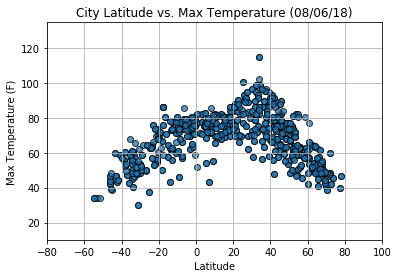

In [19]:
lat_temp = plot_lat(y='Max Temperature',y_label='Max Temperature (F)')
lat_temp

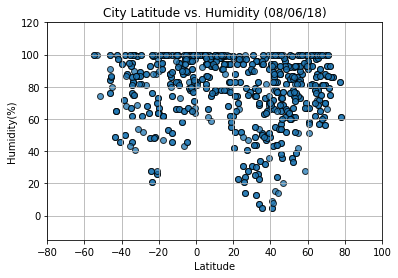

In [20]:
lat_humidity = plot_lat(y='Humidity',y_label='Humidity(%)')
lat_humidity

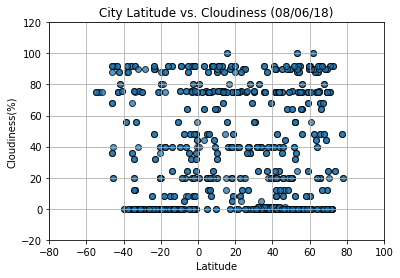

In [21]:
lat_cloud = plot_lat(y='Cloudiness',y_label='Cloudiness(%)')
lat_cloud

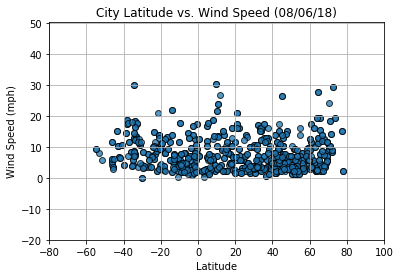

In [22]:
lat_wind = plot_lat(y='Wind Speed',y_label='Wind Speed (mph)')
lat_wind

In [23]:
def plot_lng(y,y_label):
    lat_y = plt.scatter(weather_df['Lng'],weather_df['Lat'],alpha=0.75,edgecolors='black')
    plt.title(f"City Longitude vs. {y} ({time.strftime('%m/%d/%y')})")
    plt.xlabel('Longitude') 
    plt.ylabel(y_label)
    plt.ylim(-80,100)
    plt.xlim(-200,200)
    plt.grid()
    plt.savefig(os.path.join('output_data',f'Longitude_vs_{y}.png'))

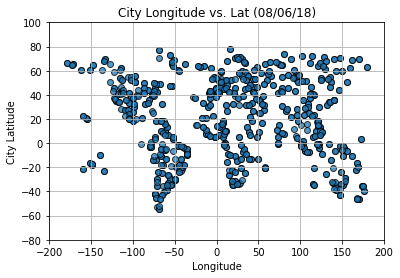

In [24]:
lng_lat = plot_lng(y='Lat',y_label='City Latitude')
lng_lat

### Weather Data Analysis

* As we approach the equator the temperature increases.
* Since data has been collected in summer the temperatures are warmer in northen hemisphire.
* There is no relationship between city latitude and wind speed, cloudiness and Humidity.